<a href="https://colab.research.google.com/github/youngjin1106/project-2/blob/main/Copy_of_Copy_of_Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
### Load Dataset 
filename = '/content/Bank Customer Churn Prediction.csv'
df = pd.read_csv(filename)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# change to df.ml from the original data
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# df_ml.shape shows 10000rows and 12 columns
df_ml.shape

(10000, 12)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df_ml.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Checking duplicates 
df_ml.duplicated().sum()

0

In [ ]:
# dropping unnecessary columns from the data
df_ml.drop(columns = 'customer_id', inplace = True)

In [ ]:
# checking for the missing values
for col in df_ml.select_dtypes(include='object').columns:
  display(df_ml[col].value_counts())
  print('\n')

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

Male      5457
Female    4543
Name: gender, dtype: int64

In [ ]:
# Switch to the name because words is more easily to understand than just number.
df_ml['churn'].replace({0:'Churn', 1:'Not Churn'}, inplace=True)
df_ml['churn'].value_counts()

Churn        7963
Not Churn    2037
Name: churn, dtype: int64

In [ ]:
# Target is "churn"
# define features X and Target Y
target = 'churn'
X = df_ml.drop(columns = target)
y = df_ml[target]

In [ ]:
# Checking outliers
df_ml.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


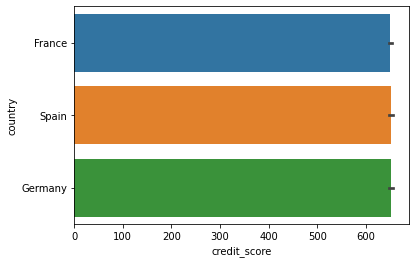

In [ ]:
# Visualizations
# Using Barplot (credit_score vs country)
# This barplot shows that Manager have the oldest age. While, Sales Representative has youngest age.
sns.barplot(data = df, x='credit_score', y ='country')

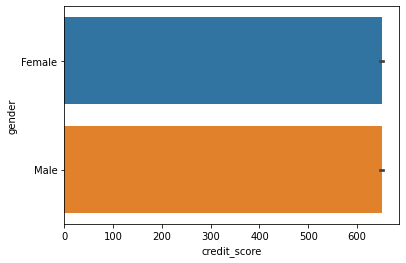

In [ ]:
# Visualizations
# Using Barplot (credit score vs gender)
sns.barplot(data = df, x='credit_score', y ='gender')

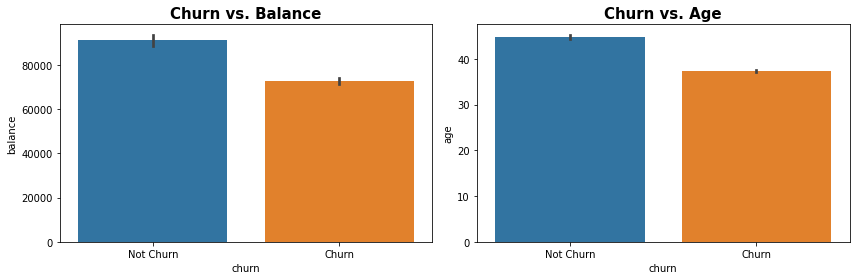

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.barplot(data=df_ml, x = 'churn', y = 'balance', ax=axes[0])
axes[0].set_title('Churn vs. Balance', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df_ml, x = 'churn', y = 'age', ax=axes[1])
axes[1].set_title('Churn vs. Age', fontsize = 15, fontweight = 'bold')

fig.tight_layout()

The task is to predict whether a bank customer will 'churn' or close their account. I think there has storng correlation between the target and the columns of Balnace and Age.

For the Churn vs Balance plot, it tells that Customer Churn has less average balance than who does not Customer Churn. This might be affected to the bank if they close their accounts. Therefore, the bank need to find a way to hold those Customer Churn. 

For the Churn vs Age plot, it tells that the average age of the Customer Chun is lower than the average age of the Customer Chun. I think some people close the account when they are approxmitely 35. Therefore, the bank need to focus on making new customers.



In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape

(7500, 10)

In [ ]:
# making column selector for the object and numerical columns
cat_col = make_column_selector(dtype_include = 'object')
num_col = make_column_selector(dtype_include = 'number')

# ohe and scaler 
ohe = OneHotEncoder(sparse = False, handle_unknown ='ignore')
scaler = StandardScaler()

# Creating Imputers
# for the using mean imputer, we can fill out the missing values with the mean value (Age Column)
# for the using most_frequent imputer, we can fill out the missing values with the most_frequent data (BP Colmn)
mean_imputer = SimpleImputer(strategy= 'mean') 
freq_imputer = SimpleImputer(strategy= 'most_frequent')

In [ ]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, ohe)

In [ ]:
num_tuple = (num_processor, num_col)
cat_tuple = (cat_processor, cat_col)

In [ ]:
# Creat column transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough')

## KNN model

In [ ]:
# KNN model
knn = KNeighborsClassifier()

# Combine KNN model and column_transformer with using pipeline
knn_pipe = make_pipeline(column_transformer, knn)

# fitting on training data
knn_pipe.fit(X_train, y_train)

# predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)


In [ ]:
# Training Matrics of Knn
print('Knn for Training Set')
knn_train_report = classification_report(y_train, knn_train_preds)
print(knn_train_report)

Knn for Training Set
              precision    recall  f1-score   support

       Churn       0.89      0.97      0.93      5960
   Not Churn       0.81      0.52      0.63      1540

    accuracy                           0.88      7500
   macro avg       0.85      0.74      0.78      7500
weighted avg       0.87      0.88      0.87      7500



In [ ]:
# Testing Matrics of Knn

print('Knn for Testing Set')
knn_test_report = classification_report(y_test, knn_test_preds)
print(knn_test_report)

Knn for Testing Set
              precision    recall  f1-score   support

       Churn       0.86      0.95      0.90      2003
   Not Churn       0.65      0.40      0.50       497

    accuracy                           0.84      2500
   macro avg       0.76      0.67      0.70      2500
weighted avg       0.82      0.84      0.82      2500



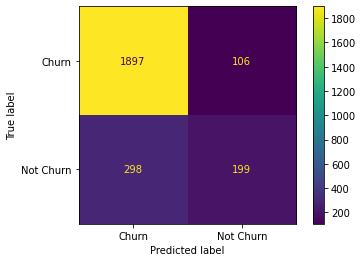

In [ ]:
# display confusion matrix for Knn
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds) ;

In [ ]:
# hypertune the Knn model
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd22aefc490>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [ ]:
# Define the hyperparameters that I want to test with
knn_params = {'kneighborsclassifier__leaf_size' : [5,7,9,11],
              'kneighborsclassifier__n_neighbors' : [10,20,30]}

In [ ]:
# Instantiate the GridSearchCV
knn_gs = GridSearchCV(knn_pipe, knn_params)


In [ ]:
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd22aefc490>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [ ]:
# look for the best result 
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 5, 'kneighborsclassifier__n_neighbors': 10}

In [ ]:
# predictions for the GridSearchCV of Knn
knn_gs_train_preds = knn_gs.predict(X_train)
knn_gs_test_preds = knn_gs.predict(X_test)

In [ ]:
# Training Matrics GridSearchCV of Knn
print('Knn_gs for Training Set')
knn_gs_train_report = classification_report(y_train, knn_gs_train_preds)
print(knn_gs_train_report)

Knn_gs for Training Set
              precision    recall  f1-score   support

       Churn       0.85      0.98      0.91      5960
   Not Churn       0.83      0.36      0.50      1540

    accuracy                           0.85      7500
   macro avg       0.84      0.67      0.71      7500
weighted avg       0.85      0.85      0.83      7500



In [ ]:
# Testing Matrics GridSearchCV of Knn
print('Knn_gs for Testing Set')
knn_gs_test_report = classification_report(y_test, knn_gs_test_preds)
print(knn_gs_test_report)

Knn_gs for Testing Set
              precision    recall  f1-score   support

       Churn       0.85      0.98      0.91      2003
   Not Churn       0.77      0.31      0.44       497

    accuracy                           0.84      2500
   macro avg       0.81      0.64      0.67      2500
weighted avg       0.83      0.84      0.82      2500



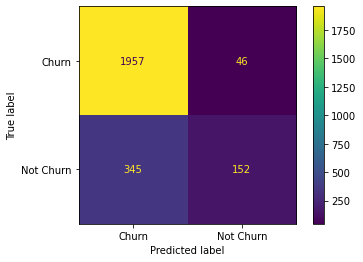

In [ ]:
# display confusion matrix for knn_gs
ConfusionMatrixDisplay.from_predictions(y_test, knn_gs_test_preds) ;

## Random Forest

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
# Creat RandomForestClassifier pipeline and the column transformer
rf_pipe = make_pipeline(column_transformer, rf)

# Fitting on training data
rf_pipe.fit(X_train, y_train)

# predictions for the RF
RF_train_preds = rf_pipe.predict(X_train)
RF_test_preds = rf_pipe.predict(X_test)

# Training Matrics of RF
print('RF for Training Set')
RF_train_report = classification_report(y_train, RF_train_preds)
print(RF_train_report)

RF for Training Set
              precision    recall  f1-score   support

       Churn       1.00      1.00      1.00      5960
   Not Churn       1.00      1.00      1.00      1540

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [ ]:
# Testing Matrics of RF
print('RF for Testing Set')
RF_test_report = classification_report(y_test, RF_test_preds)
print(RF_train_report)

RF for Testing Set
              precision    recall  f1-score   support

       Churn       1.00      1.00      1.00      5960
   Not Churn       1.00      1.00      1.00      1540

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



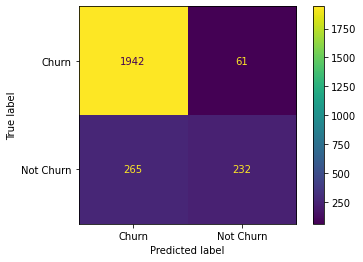

In [ ]:
# display confusion matrix for RF
ConfusionMatrixDisplay.from_predictions(y_test, RF_test_preds) ;

In [ ]:
# hypertune the random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd22aefc490>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [ ]:
# Define the hyperparameters which I choose 
rf_params = {'randomforestclassifier__max_depth': [None, 7],
             'randomforestclassifier__n_estimators': [100, 200, 300],
             'randomforestclassifier__min_samples_split': [2,4]}

In [ ]:
# Instantiate the Gridsearch with the Random Forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd22aefc490>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [ ]:
# looking for the best result 
rf_gs.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__n_estimators': 300}

In [ ]:
# predictions for the GridSearchCV with random forest classifier
rf_gs_train_preds = rf_gs.predict(X_train)
rf_gs_test_preds = rf_gs.predict(X_test)

In [ ]:
# Training Matrics of RF_gs
print('RF_gs for Training Set')
RF_gs_train_report = classification_report(y_train, rf_gs_train_preds)
print(RF_gs_train_report)

RF_gs for Training Set
              precision    recall  f1-score   support

       Churn       0.99      1.00      0.99      5960
   Not Churn       1.00      0.95      0.98      1540

    accuracy                           0.99      7500
   macro avg       0.99      0.98      0.98      7500
weighted avg       0.99      0.99      0.99      7500



In [ ]:
# Testing Matrics of RF_gs
print('RF_gs for Testing Set')
RF_gs_test_report = classification_report(y_test, rf_gs_test_preds)
print(RF_gs_test_report)

RF_gs for Testing Set
              precision    recall  f1-score   support

       Churn       0.88      0.97      0.92      2003
   Not Churn       0.78      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



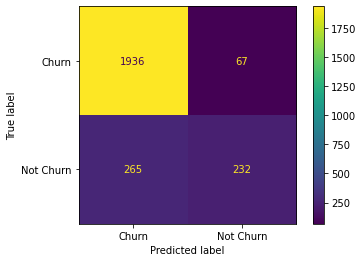

In [ ]:
# display confusion matrix for RF_gs
ConfusionMatrixDisplay.from_predictions(y_test, rf_gs_test_preds) ;

I will chose the Random Foresst model because there has less errors when i compared with other confusion matrixs.
Confusion matrix for the RF_gs shows 46 errors in the total, but other confusion matrix shows more error than RF_gsTrue Negative is better than True Positive at pridicting in the confusion matrix for the RF_gs

These are cases in which we predicted that there has a lot of Churn Customers.
I will recommend to find new customers as many as you can since there has a lot of Churn Customers in the bank.  

